In [2]:
!pip install numpy matplotlib scipy pandas plotly seaborn

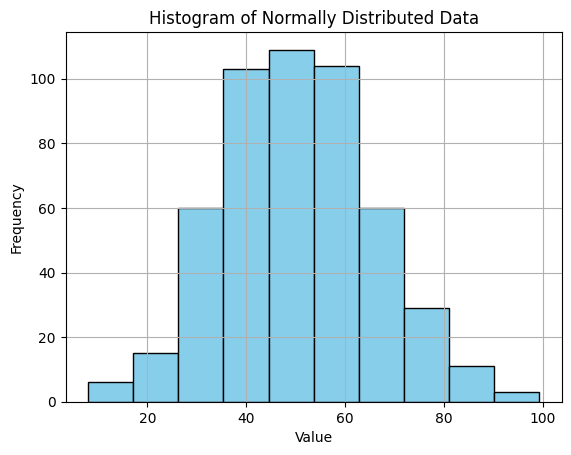

In [3]:
import matplotlib.pyplot as plt
import numpy as np
data = np.random.normal(loc=50, scale=15, size=500)
plt.hist(data, bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Normally Distributed Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [4]:
from scipy.stats import skew
skew_value = skew(data)
print(f"Skewness: {skew_value:.2f}")

Skewness: 0.16


In [5]:
import pandas as pd
import numpy as np
df = pd.DataFrame({
'X': np.random.randint(20, 100, 100),
'Y': np.random.randint(30, 120, 100)
})
correlation = df.corr()
print(correlation)

         X        Y
X  1.00000 -0.08039
Y -0.08039  1.00000


In [6]:
import pandas as pd #data analysis and manipulation.
import numpy as np # maths equation 
import plotly.graph_objects as go 
import plotly.express as px
import plotly.offline as py
from scipy.stats import norm , skew
import seaborn as sns #matplotlib and pandas

In [9]:
df = sns.load_dataset('penguins').dropna()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [12]:
#selecting only numeric columns for futher processing

numeric_cols = df.select_dtypes(include='number').columns

In [13]:
corr_matrix = df[numeric_cols].corr()
corr_matrix

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


In [14]:
print(numeric_cols)

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')


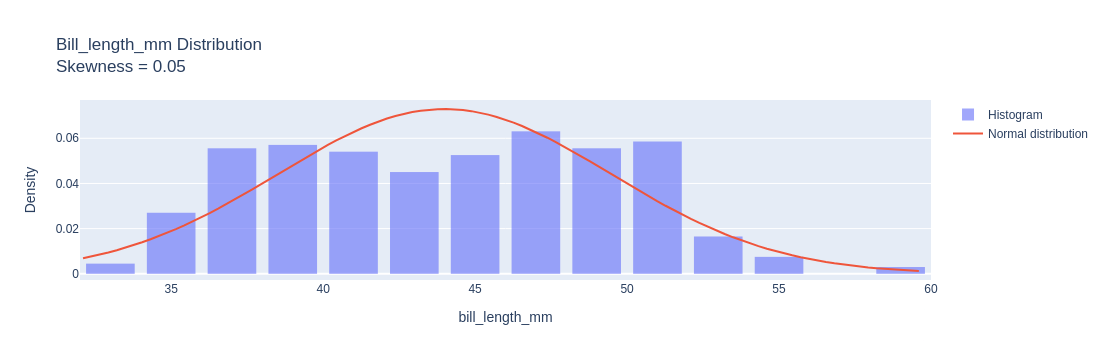

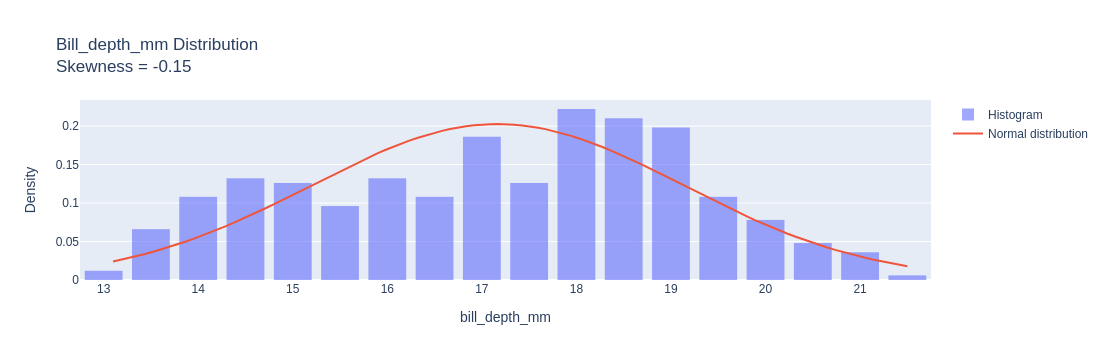

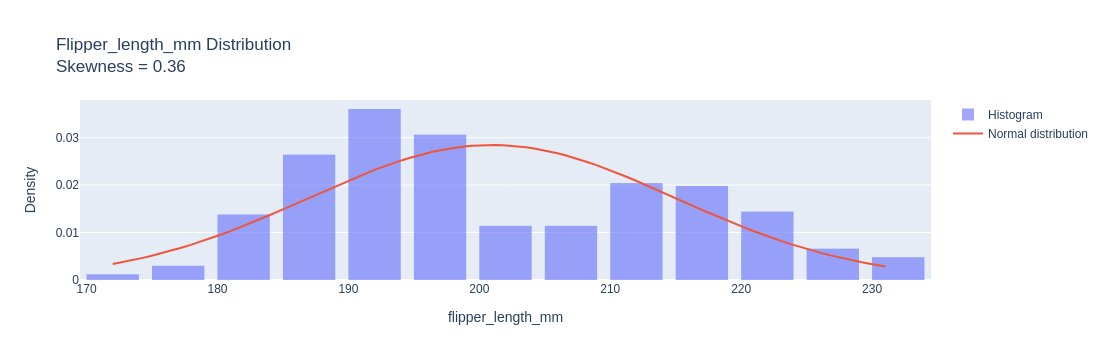

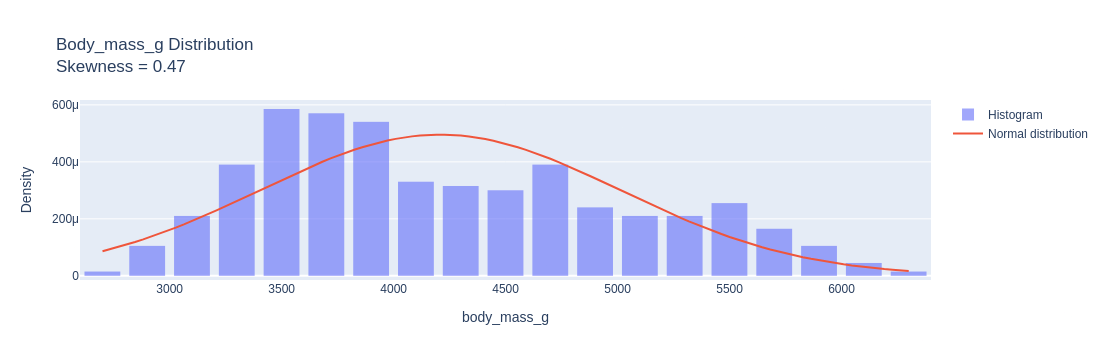

In [15]:
for col in numeric_cols:
    x = df[col]
    mean, std = x.mean(), x.std()

    # plotting histogram with density curve (mix of normal distribution and ...)
    hist = go.Histogram(x=x, histnorm='probability density', name='Histogram', opacity=0.6)
    x_range = np.linspace(x.min(), x.max(), 100)

    normal_curve = go.Scatter(
        x=x_range,
        y=norm.pdf(x_range, mean, std),mode='lines',name='Normal distribution'
    )

    layout = go.Layout(
        title=f'{col.capitalize()} Distribution<br>Skewness = {x.skew():.2f}',
        xaxis_title=col,
        yaxis_title='Density',
        bargap=0.2
       
    )

    fig = go.Figure(data=[hist, normal_curve], layout=layout)
    fig.show()

In [16]:
corr_matrix = df[numeric_cols].corr()
corr_matrix

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


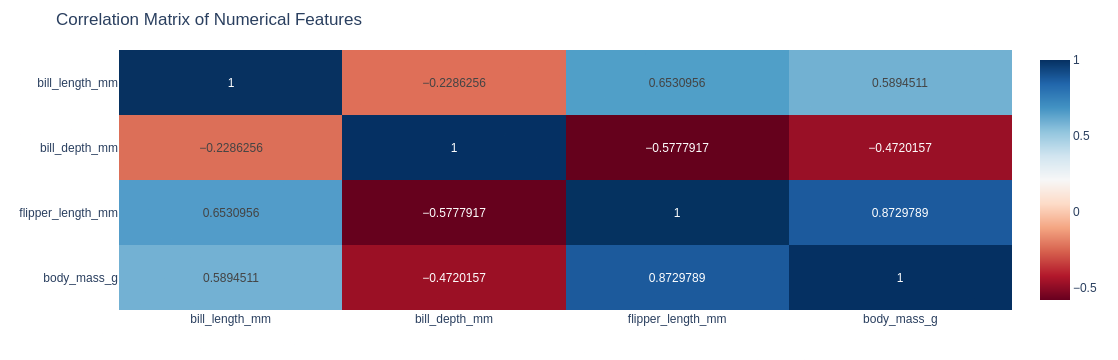

In [17]:
fig = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale='RdBu',
    title='Correlation Matrix of Numerical Features',
    aspect="auto"
)

fig.update_layout(margin=dict(l=60, r=60, t=50, b=50))
fig.show()

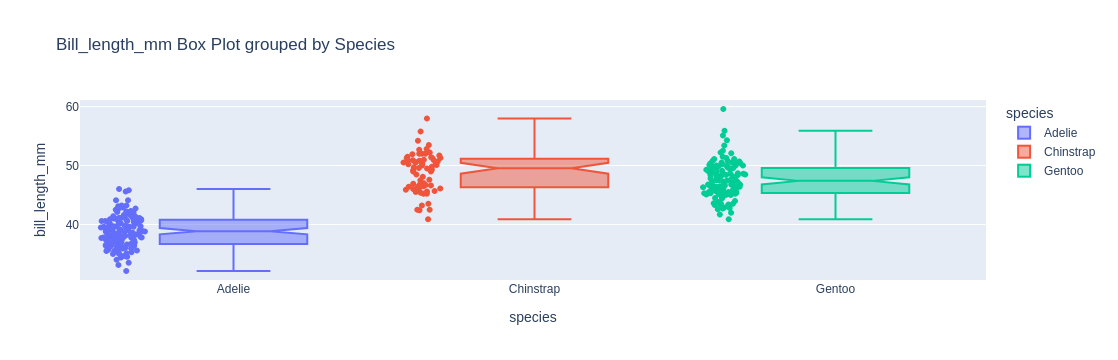

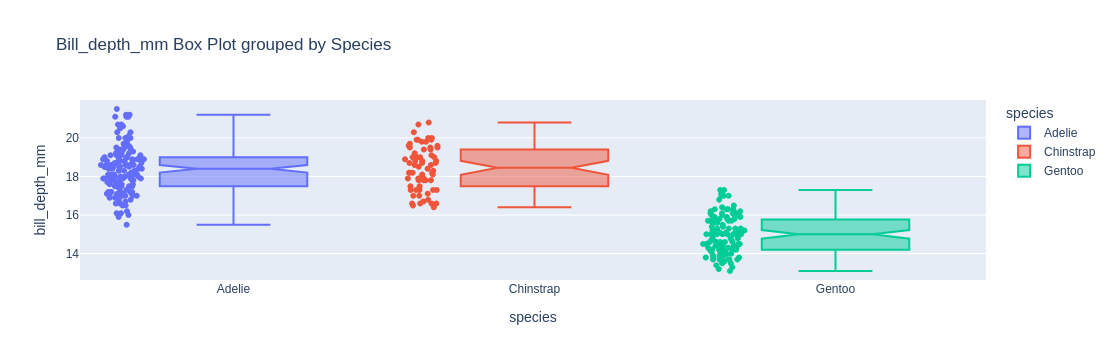

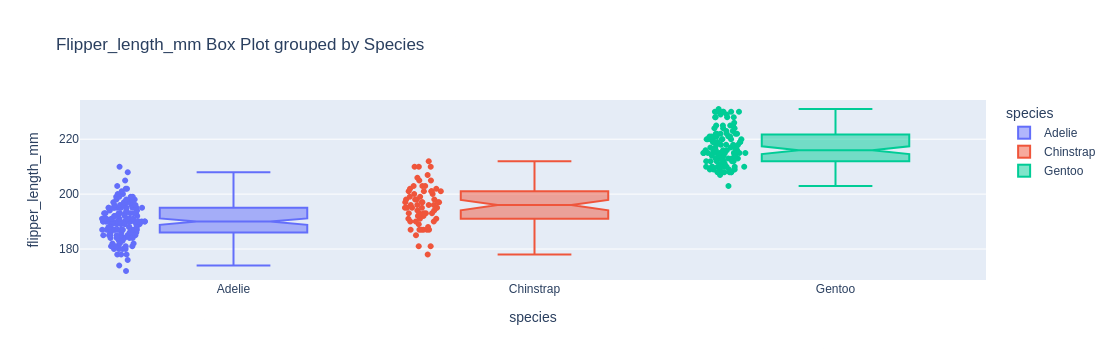

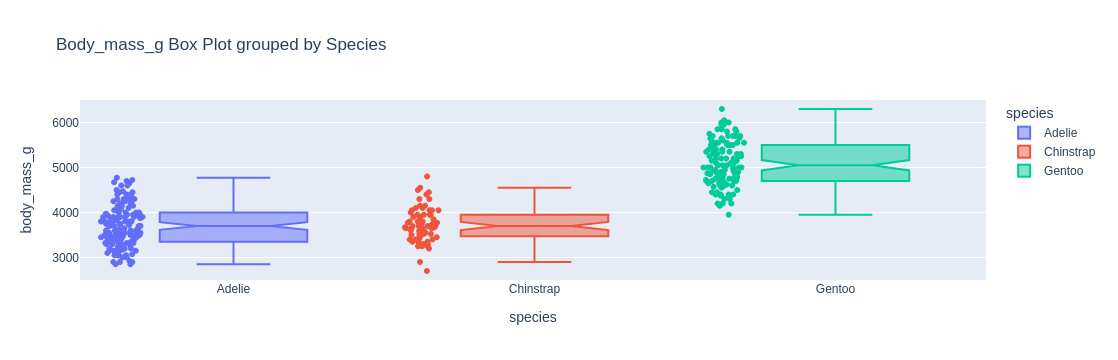

In [18]:
#Boxplot
categorical_cols= 'species'

for col in numeric_cols:
    fig = px.box(df,x=categorical_cols,y=col, points='all',color=categorical_cols,
                title=f'{col.capitalize()} Box Plot grouped by {categorical_cols.capitalize()}',
                notched=True)
    fig.update_layout(yaxis_title=col, xaxis_title=categorical_cols)
    fig.show()